In [29]:
#Importing pandas library and the dataset
import pandas as pd
df = pd.read_csv('Sigmoid_Spotify_Data_2.csv')

In [30]:
#Removing the duplicates of songs from the same listener
df = df[~pd.DataFrame(np.sort(df[['sigmaritan','trackName', 'artistName']], axis=1)).duplicated(keep='first')]

In [32]:
#Reseting the index
df.reset_index(inplace = True, drop = True)

In [33]:
df

,Unnamed: 0,sigmaritan,endTime,artistName,trackName,msPlayed
0,0,alex_clefos,2021-05-06 23:04,Shinedown,My Name (Wearing Me Out),83780
1,1,alex_clefos,2021-05-07 00:29,Disturbed,Deify,1440453
2,2,alex_clefos,2021-05-07 00:29,Disturbed,Guarded,1776
3,6,alex_clefos,2021-05-07 01:06,Skillet,Falling Inside the Black,1700
4,7,alex_clefos,2021-05-07 01:06,Disturbed,Indestructible,543770
...,...,...,...,...,...,...
46717,18010,vladimir_stojoc,2022-04-13 15:12,XXXTENTACION,HEARTEATER,14456
46718,18012,vladimir_stojoc,2022-04-13 15:19,Chow Mane,Sorry,231000
46719,18013,vladimir_stojoc,2022-04-13 16:57,Mudrigo,Tears,15084
46720,18046,vladimir_stojoc,2022-04-14 13:19,Грязь,Рычит мотор,1860


In [5]:
#Imported other needed libraries
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import json
import csv
import numpy as np

In [ ]:
#Defining necessities for spotipy
username = 'pulberevlada'
client_id ='3d002a549bb443659d41f2c1cb31e4fd'
client_secret = 'cc666e11f2a749b684d198721dfae38c'
redirect_uri = 'http://localhost:8080/callback'
scope = 'user-read-recently-played'

In [6]:
#Defining necessities for spotipy
username = 'vladapulbere'
client_id ='9cf2c6105443487fb9ccbf576819d934'
client_secret = '365fcd5fc7834059a14594c35abc37d3'
redirect_uri = 'http://localhost:8080/callback'
scope = 'user-read-recently-played'

In [7]:
#Getting the token
token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)

In [8]:
#Spotipy api authorization
sp = spotipy.Spotify(auth = token)

In [20]:
def get_score(df):
    for i in range(0,df.shape[0]):
        artist = df.iloc[i][3]
        track = df.iloc[i][4]
        try:
            track_info = sp.search(q='artist:' + artist + ' track:' + track, type='track')
            trackId = track_info['tracks']['items'][0]['id'] 
            score = sp.audio_features(trackId)[0]
            df.at[i, 'energy'] = score['energy']
            df.at[i, 'danceability'] = score['danceability']
            df.at[i, 'valence'] = score['valence']
            df.at[i, 'tempo'] = score['tempo']
        except:
            token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)
            sp = spotipy.Spotify(auth = token)
            track_info = sp.search(q='artist:' + artist + ' track:' + track, type='track')
            try:
                trackId = track_info['tracks']['items'][0]['id'] 
                score = sp.audio_features(trackId)[0]
                try:
                    df.at[i, 'energy'] = score['energy']
                    df.at[i, 'danceability'] = score['danceability']
                    df.at[i, 'valence'] = score['valence']
                    df.at[i, 'tempo'] = score['tempo']
                except:
                    df.at[i, 'energy'] = score['energy']
                    df.at[i, 'danceability'] = 0
                    df.at[i, 'valence'] = 0
                    df.at[i, 'tempo'] = 0
            except:
                df.at[i, 'energy'] = score['energy']
                df.at[i, 'danceability'] = 0
                df.at[i, 'valence'] = 0
                df.at[i, 'tempo'] = 0
        #print(i)
        df.to_csv('values.csv', index = False)
    return df

In [21]:
#Getting scores and saving them in a csv document
get_score(df)

28112
28113
28114
28115
28116
28117
28118
28119
28120
28121
28122
28123
28124
28125
28126
28127
28128
28129
28130
28131
28132
28133
28134
28135
28136
28137
28138
28139
28140
28141
28142
28143
28144
28145
28146
28147
28148
28149
28150
28151
28152
28153
28154
28155
28156
28157
28158
28159
28160
28161
28162
28163
28164
28165
28166
28167
28168
28169
28170
28171
28172
28173
28174
28175
28176
28177
28178
28179
28180
28181
28182
28183
28184
28185
28186
28187
28188
28189
28190
28191
28192
28193
28194
28195
28196
28197
28198
28199
28200
28201
28202
28203
28204
28205
28206
28207
28208
28209
28210
28211
28212
28213
28214
28215
28216
28217
28218
28219
28220
28221
28222
28223
28224
28225
28226
28227
28228
28229
28230
28231
28232
28233
28234
28235
28236
28237
28238
28239
28240
28241
28242
28243
28244
28245
28246
28247
28248
28249
28250
28251
28252
28253
28254
28255
28256
28257
28258
28259
28260
28261
28262
28263
28264
28265
28266
28267
28268
28269
28270
28271
28272
28273
28274
28275
28276
28277
2827

29478
29479
29480
29481
29482
29483
29484
29485
29486
29487
29488
29489
29490
29491
29492
29493
29494
29495
29496
29497
29498
29499
29500
29501
29502
29503
29504
29505
29506
29507
29508
29509
29510
29511
29512
29513
29514
29515
29516
29517
29518
29519
29520
29521
29522
29523
29524
29525
29526
29527
29528
29529
29530
29531
29532
29533
29534
29535
29536
29537
29538
29539
29540
29541
29542
29543
29544
29545
29546
29547
29548
29549
29550
29551
29552
29553
29554
29555
29556
29557
29558
29559
29560
29561
29562
29563
29564
29565
29566
29567
29568
29569
29570
29571
29572
29573
29574
29575
29576
29577
29578
29579
29580
29581
29582
29583
29584
29585
29586
29587
29588
29589
29590
29591
29592
29593
29594
29595
29596
29597
29598
29599
29600
29601
29602
29603
29604
29605
29606
29607
29608
29609
29610
29611
29612
29613
29614
29615
29616
29617
29618
29619
29620
29621
29622
29623
29624
29625
29626
29627
29628
29629
29630
29631
29632
29633
29634
29635
29636
29637
29638
29639
29640
29641
29642
29643
2964

30844
30845
30846
30847
30848
30849
30850
30851
30852
30853
30854
30855
30856
30857
30858
30859
30860
30861
30862
30863
30864
30865
30866
30867
30868
30869
30870
30871
30872
30873
30874
30875
30876
30877
30878
30879
30880
30881
30882
30883
30884
30885
30886
30887
30888
30889
30890
30891
30892
30893
30894
30895
30896
30897
30898
30899
30900
30901
30902
30903
30904
30905
30906
30907
30908
30909
30910
30911
30912
30913
30914
30915
30916
30917
30918
30919
30920
30921
30922
30923
30924
30925
30926
30927
30928
30929
30930
30931
30932
30933
30934
30935
30936
30937
30938
30939
30940
30941
30942
30943
30944
30945
30946
30947
30948
30949
30950
30951
30952
30953
30954
30955
30956
30957
30958
30959
30960
30961
30962
30963
30964
30965
30966
30967
30968
30969
30970
30971
30972
30973
30974
30975
30976
30977
30978
30979
30980
30981
30982
30983
30984
30985
30986
30987
30988
30989
30990
30991
30992
30993
30994
30995
30996
30997
30998
30999
31000
31001
31002
31003
31004
31005
31006
31007
31008
31009
3101

32210
32211
32212
32213
32214
32215
32216
32217
32218
32219
32220
32221
32222
32223
32224
32225
32226
32227
32228
32229
32230
32231
32232
32233
32234
32235
32236
32237
32238
32239
32240
32241
32242
32243
32244
32245
32246
32247
32248
32249
32250
32251
32252
32253
32254
32255
32256
32257
32258
32259
32260
32261
32262
32263
32264
32265
32266
32267
32268
32269
32270
32271
32272
32273
32274
32275
32276
32277
32278
32279
32280
32281
32282
32283
32284
32285
32286
32287
32288
32289
32290
32291
32292
32293
32294
32295
32296
32297
32298
32299
32300
32301
32302
32303
32304
32305
32306
32307
32308
32309
32310
32311
32312
32313
32314
32315
32316
32317
32318
32319
32320
32321
32322
32323
32324
32325
32326
32327
32328
32329
32330
32331
32332
32333
32334
32335
32336
32337
32338
32339
32340
32341
32342
32343
32344
32345
32346
32347
32348
32349
32350
32351
32352
32353
32354
32355
32356
32357
32358
32359
32360
32361
32362
32363
32364
32365
32366
32367
32368
32369
32370
32371
32372
32373
32374
32375
3237

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': "artist:Claude Debussy track:Le diable dans le beffroi, L. 101, Tableau 2 (Completed & Orchestrated by R. Orledge): Tableau 2: Savez-vous planter… (Children's Chorus)", 'limit': 10, 'offset': 0, 'type': 'track', 'market': None} returned 401 due to The access token expired


32587
32588
32589
32590
32591
32592
32593
32594
32595
32596
32597
32598
32599
32600
32601
32602
32603
32604
32605
32606
32607
32608
32609
32610
32611
32612
32613
32614
32615
32616
32617
32618
32619
32620
32621
32622
32623
32624
32625
32626
32627
32628
32629
32630
32631
32632
32633
32634
32635
32636
32637
32638
32639
32640
32641
32642
32643
32644
32645
32646
32647
32648
32649
32650
32651
32652
32653
32654
32655
32656
32657
32658
32659
32660
32661
32662
32663
32664
32665
32666
32667
32668
32669
32670
32671
32672
32673
32674
32675
32676
32677
32678
32679
32680
32681
32682
32683
32684
32685
32686
32687
32688
32689
32690
32691
32692
32693
32694
32695
32696
32697
32698
32699
32700
32701
32702
32703
32704
32705
32706
32707
32708
32709
32710
32711
32712
32713
32714
32715
32716
32717
32718
32719
32720
32721
32722
32723
32724
32725
32726
32727
32728
32729
32730
32731
32732
32733
32734
32735
32736
32737
32738
32739
32740
32741
32742
32743
32744
32745
32746
32747
32748
32749
32750
32751
32752
3275

33953
33954
33955
33956
33957
33958
33959
33960
33961
33962
33963
33964
33965
33966
33967
33968
33969
33970
33971
33972
33973
33974
33975
33976
33977
33978
33979
33980
33981
33982
33983
33984
33985
33986
33987
33988
33989
33990
33991
33992
33993
33994
33995
33996
33997
33998
33999
34000
34001
34002
34003
34004
34005
34006
34007
34008
34009
34010
34011
34012
34013
34014
34015
34016
34017
34018
34019
34020
34021
34022
34023
34024
34025
34026
34027
34028
34029
34030
34031
34032
34033
34034
34035
34036
34037
34038
34039
34040
34041
34042
34043
34044
34045
34046
34047
34048
34049
34050
34051
34052
34053
34054
34055
34056
34057
34058
34059
34060
34061
34062
34063
34064
34065
34066
34067
34068
34069
34070
34071
34072
34073
34074
34075
34076
34077
34078
34079
34080
34081
34082
34083
34084
34085
34086
34087
34088
34089
34090
34091
34092
34093
34094
34095
34096
34097
34098
34099
34100
34101
34102
34103
34104
34105
34106
34107
34108
34109
34110
34111
34112
34113
34114
34115
34116
34117
34118
3411

35319
35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
35331
35332
35333
35334
35335
35336
35337
35338
35339
35340
35341
35342
35343
35344
35345
35346
35347
35348
35349
35350
35351
35352
35353
35354
35355
35356
35357
35358
35359
35360
35361
35362
35363
35364
35365
35366
35367
35368
35369
35370
35371
35372
35373
35374
35375
35376
35377
35378
35379
35380
35381
35382
35383
35384
35385
35386
35387
35388
35389
35390
35391
35392
35393
35394
35395
35396
35397
35398
35399
35400
35401
35402
35403
35404
35405
35406
35407
35408
35409
35410
35411
35412
35413
35414
35415
35416
35417
35418
35419
35420
35421
35422
35423
35424
35425
35426
35427
35428
35429
35430
35431
35432
35433
35434
35435
35436
35437
35438
35439
35440
35441
35442
35443
35444
35445
35446
35447
35448
35449
35450
35451
35452
35453
35454
35455
35456
35457
35458
35459
35460
35461
35462
35463
35464
35465
35466
35467
35468
35469
35470
35471
35472
35473
35474
35475
35476
35477
35478
35479
35480
35481
35482
35483
35484
3548

36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
36761
36762
36763
36764
36765
36766
36767
36768
36769
36770
36771
36772
36773
36774
36775
36776
36777
36778
36779
36780
36781
36782
36783
36784
36785
36786
36787
36788
36789
36790
36791
36792
36793
36794
36795
36796
36797
36798
36799
36800
36801
36802
36803
36804
36805
36806
36807
36808
36809
36810
36811
36812
36813
36814
36815
36816
36817
36818
36819
36820
36821
36822
36823
36824
36825
36826
36827
36828
36829
36830
36831
36832
36833
36834
36835
36836
36837
36838
36839
36840
36841
36842
36843
36844
36845
36846
36847
36848
36849
36850
3685

38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
38073
38074
38075
38076
38077
38078
38079
38080
38081
38082
38083
38084
38085
38086
38087
38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38171
38172
38173
38174
38175
38176
38177
38178
38179
38180
38181
38182
38183
38184
38185
38186
38187
38188
38189
38190
38191
38192
38193
38194
38195
38196
38197
38198
38199
38200
38201
38202
38203
38204
38205
38206
38207
38208
38209
38210
38211
38212
38213
38214
38215
38216
3821

39417
39418
39419
39420
39421
39422
39423
39424
39425
39426
39427
39428
39429
39430
39431
39432
39433
39434
39435
39436
39437
39438
39439
39440
39441
39442
39443
39444
39445
39446
39447
39448
39449
39450
39451
39452
39453
39454
39455
39456
39457
39458
39459
39460
39461
39462
39463
39464
39465
39466
39467
39468
39469
39470
39471
39472
39473
39474
39475
39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
39488
39489
39490
39491
39492
39493
39494
39495
39496
39497
39498
39499
39500
39501
39502
39503
39504
39505
39506
39507
39508
39509
39510
39511
39512
39513
39514
39515
39516
39517
39518
39519
39520
39521
39522
39523
39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540
39541
39542
39543
39544
39545
39546
39547
39548
39549
39550
39551
39552
39553
39554
39555
39556
39557
39558
39559
39560
39561
39562
39563
39564
39565
39566
39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582
3958

40783
40784
40785
40786
40787
40788
40789
40790
40791
40792
40793
40794
40795
40796
40797
40798
40799
40800
40801
40802
40803
40804
40805
40806
40807
40808
40809
40810
40811
40812
40813
40814
40815
40816
40817
40818
40819
40820
40821
40822
40823
40824
40825
40826
40827
40828
40829
40830
40831
40832
40833
40834
40835
40836
40837
40838
40839
40840
40841
40842
40843
40844
40845
40846
40847
40848
40849
40850
40851
40852
40853
40854
40855
40856
40857
40858
40859
40860
40861
40862
40863
40864
40865
40866
40867
40868
40869
40870
40871
40872
40873
40874
40875
40876
40877
40878
40879
40880
40881
40882
40883
40884
40885
40886
40887
40888
40889
40890
40891
40892
40893
40894
40895
40896
40897
40898
40899
40900
40901
40902
40903
40904
40905
40906
40907
40908
40909
40910
40911
40912
40913
40914
40915
40916
40917
40918
40919
40920
40921
40922
40923
40924
40925
40926
40927
40928
40929
40930
40931
40932
40933
40934
40935
40936
40937
40938
40939
40940
40941
40942
40943
40944
40945
40946
40947
40948
4094

42149
42150
42151
42152
42153
42154
42155
42156
42157
42158
42159
42160
42161
42162
42163
42164
42165
42166
42167
42168
42169
42170
42171
42172
42173
42174
42175
42176
42177
42178
42179
42180
42181
42182
42183
42184
42185
42186
42187
42188
42189
42190
42191
42192
42193
42194
42195
42196
42197
42198
42199
42200
42201
42202
42203
42204
42205
42206
42207
42208
42209
42210
42211
42212
42213
42214
42215
42216
42217
42218
42219
42220
42221
42222
42223
42224
42225
42226
42227
42228
42229
42230
42231
42232
42233
42234
42235
42236
42237
42238
42239
42240
42241
42242
42243
42244
42245
42246
42247
42248
42249
42250
42251
42252
42253
42254
42255
42256
42257
42258
42259
42260
42261
42262
42263
42264
42265
42266
42267
42268
42269
42270
42271
42272
42273
42274
42275
42276
42277
42278
42279
42280
42281
42282
42283
42284
42285
42286
42287
42288
42289
42290
42291
42292
42293
42294
42295
42296
42297
42298
42299
42300
42301
42302
42303
42304
42305
42306
42307
42308
42309
42310
42311
42312
42313
42314
4231

43515
43516
43517
43518
43519
43520
43521
43522
43523
43524
43525
43526
43527
43528
43529
43530
43531
43532
43533
43534
43535
43536
43537
43538
43539
43540
43541
43542
43543
43544
43545
43546
43547
43548
43549
43550
43551
43552
43553
43554
43555
43556
43557
43558
43559
43560
43561
43562
43563
43564
43565
43566
43567
43568
43569
43570
43571
43572
43573
43574
43575
43576
43577
43578
43579
43580
43581
43582
43583
43584
43585
43586
43587
43588
43589
43590
43591
43592
43593
43594
43595
43596
43597
43598
43599
43600
43601
43602
43603
43604
43605
43606
43607
43608
43609
43610
43611
43612
43613
43614
43615
43616
43617
43618
43619
43620
43621
43622
43623
43624
43625
43626
43627
43628
43629
43630
43631
43632
43633
43634
43635
43636
43637
43638
43639
43640
43641
43642
43643
43644
43645
43646
43647
43648
43649
43650
43651
43652
43653
43654
43655
43656
43657
43658
43659
43660
43661
43662
43663
43664
43665
43666
43667
43668
43669
43670
43671
43672
43673
43674
43675
43676
43677
43678
43679
43680
4368

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'artist:eaup track:Floating', 'limit': 10, 'offset': 0, 'type': 'track', 'market': None} returned 401 due to The access token expired


44305
44306
44307
44308
44309
44310
44311
44312
44313
44314
44315
44316
44317
44318
44319
44320
44321
44322
44323
44324
44325
44326
44327
44328
44329
44330
44331
44332
44333
44334
44335
44336
44337
44338
44339
44340
44341
44342
44343
44344
44345
44346
44347
44348
44349
44350
44351
44352
44353
44354
44355
44356
44357
44358
44359
44360
44361
44362
44363
44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44380
44381
44382
44383
44384
44385
44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44460
44461
44462
44463
44464
44465
44466
44467
44468
44469
44470
4447

45671
45672
45673
45674
45675
45676
45677
45678
45679
45680
45681
45682
45683
45684
45685
45686
45687
45688
45689
45690
45691
45692
45693
45694
45695
45696
45697
45698
45699
45700
45701
45702
45703
45704
45705
45706
45707
45708
45709
45710
45711
45712
45713
45714
45715
45716
45717
45718
45719
45720
45721
45722
45723
45724
45725
45726
45727
45728
45729
45730
45731
45732
45733
45734
45735
45736
45737
45738
45739
45740
45741
45742
45743
45744
45745
45746
45747
45748
45749
45750
45751
45752
45753
45754
45755
45756
45757
45758
45759
45760
45761
45762
45763
45764
45765
45766
45767
45768
45769
45770
45771
45772
45773
45774
45775
45776
45777
45778
45779
45780
45781
45782
45783
45784
45785
45786
45787
45788
45789
45790
45791
45792
45793
45794
45795
45796
45797
45798
45799
45800
45801
45802
45803
45804
45805
45806
45807
45808
45809
45810
45811
45812
45813
45814
45815
45816
45817
45818
45819
45820
45821
45822
45823
45824
45825
45826
45827
45828
45829
45830
45831
45832
45833
45834
45835
45836
4583

,Unnamed: 0,sigmaritan,endTime,artistName,trackName,msPlayed,energy,danceability,valence,tempo
0,0,alex_clefos,2021-05-06 23:04,Shinedown,My Name (Wearing Me Out),83780,0.989,0.454,0.169,139.964
1,1,alex_clefos,2021-05-07 00:29,Disturbed,Deify,1440453,0.952,0.539,0.342,104.970
2,2,alex_clefos,2021-05-07 00:29,Disturbed,Guarded,1776,0.936,0.498,0.378,136.912
3,6,alex_clefos,2021-05-07 01:06,Skillet,Falling Inside the Black,1700,0.942,0.501,0.461,92.967
4,7,alex_clefos,2021-05-07 01:06,Disturbed,Indestructible,543770,0.966,0.429,0.525,179.956
...,...,...,...,...,...,...,...,...,...,...
46717,18010,vladimir_stojoc,2022-04-13 15:12,XXXTENTACION,HEARTEATER,14456,0.527,0.780,0.588,99.986
46718,18012,vladimir_stojoc,2022-04-13 15:19,Chow Mane,Sorry,231000,0.603,0.660,0.588,79.985
46719,18013,vladimir_stojoc,2022-04-13 16:57,Mudrigo,Tears,15084,0.620,0.584,0.861,145.930
46720,18046,vladimir_stojoc,2022-04-14 13:19,Грязь,Рычит мотор,1860,0.793,0.663,0.173,100.056


In [35]:
#Importing libraries for visualising data
import matplotlib.pyplot as plt
import seaborn as sns
values = pd.read_csv('values.csv')

In [36]:
#Deleting unnecessary columns
values = values.drop(['Unnamed: 0', 'endTime', 'artistName', 'trackName', 'msPlayed'], axis = 1)

In [38]:
#Because spotify doesn't have data for all of the tracks and has 0 as a score, or doesn't have at all a description for the track
#We are removing those rows
values = values.loc[values['energy'] != 0]
values = values.loc[values['danceability'] != 0]
values = values.loc[values['valence'] != 0]
values = values.loc[values['tempo'] != 0]

In [39]:
#Finding mean values for every sigmaritan
df2 = values.groupby(["sigmaritan"], as_index=False).mean(numeric_only=True)

In [41]:
#Saving mean values
energy = df2['energy'].mean()
danceability = df2['danceability'].mean()
valence = df2['valence'].mean()
tempo = df2['tempo'].mean()

In [42]:
#Adding a row for mean values for entire dataset
df2.loc[len(df2.index)] = ['mean', energy, danceability, valence, tempo]

In [43]:
def plot_means(value):
    '''
        This function is plotting in a scatter plot values of mean scores for every charasteristic
    '''
    mean_list = df2[value].mean()
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes()
    plt.scatter(df2['sigmaritan'].to_list()[0:-1], df2[value].to_list()[0:-1])
    plt.title(value)
    plt.xticks(rotation=90)
    plt.xlabel("Sigmaritan")
    plt.ylabel("Mean")
    ax.plot([0,14], [mean_list, mean_list], color = 'red')
    plt.show()
    print(str(value) + " mean = " + str(mean_list))

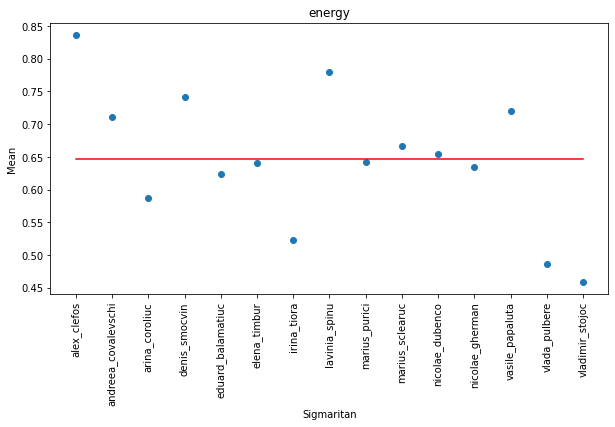

energy mean = 0.6470310543227622


In [44]:
plot_means('energy')

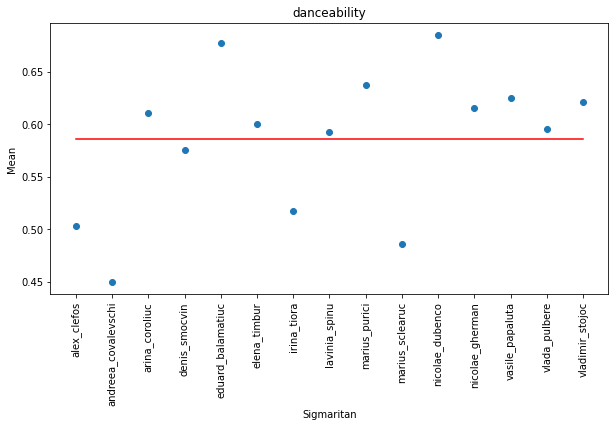

danceability mean = 0.5859465561594328


In [45]:
plot_means('danceability')

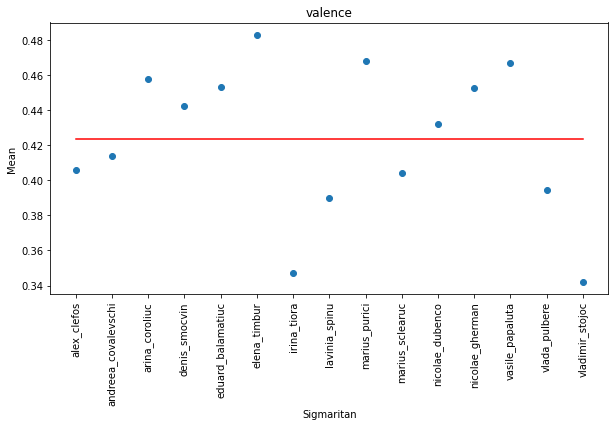

valence mean = 0.42356764008915354


In [46]:
plot_means('valence')

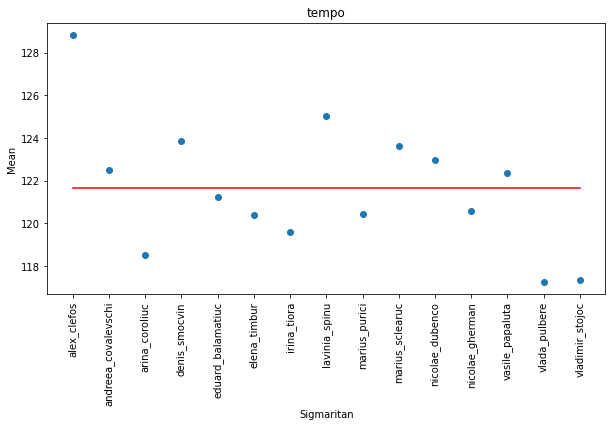

tempo mean = 121.62621313446954


In [47]:
plot_means('tempo')

In [48]:
df2

,sigmaritan,energy,danceability,valence,tempo
0,alex_clefos,0.836610,0.502875,0.405703,128.829043
1,andreea_covalevschi,0.710757,0.449651,0.413897,122.500013
2,arina_coroliuc,0.586346,0.610177,0.457723,118.518071
3,denis_smocvin,0.742059,0.575356,0.442180,123.830053
4,eduard_balamatiuc,0.623865,0.677276,0.453297,121.224153
5,elena_timbur,0.640411,0.599622,0.482984,120.366621
6,irina_tiora,0.522172,0.517497,0.346859,119.570217
7,lavinia_spinu,0.780510,0.592216,0.389737,125.034020
8,marius_purici,0.642618,0.637237,0.468233,120.448356
9,marius_sclearuc,0.666944,0.486100,0.404296,123.612276


In [49]:
#Saving results
df2.to_csv('mood_values.csv', index = False)